In [1]:
%matplotlib inline
import json
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
json_data=open('../json.data/200withMeta.json')
data = json.load(json_data)
json_data.close()

In [3]:
data[0]

{u'exec_time': u'31 ms',
 u'filename': u'1.cpp',
 u'function_count': 2,
 u'function_details': [{u'cyclomatic_complexity': 6,
   u'end_line': 83,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1.cpp',
   u'general_fan_out': 0,
   u'length': 71,
   u'long_name': u'solve()',
   u'name': u'solve',
   u'nloc': 31,
   u'parameters': [],
   u'start_line': 13,
   u'token_count': 215,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 3,
   u'end_line': 109,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1.cpp',
   u'general_fan_out': 0,
   u'length': 23,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 10,
   u'parameters': [],
   u'start_line': 87,
   u'token_count': 62,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'memory': u'200 KB',
 u'nloc': 45,
 u'problem': u'https://www.codeforces.com/contest/492/problem/B',
 u'solution': u'https://www.codeforces.com/contest/492/submission/44082853',
 u'token_count': 296,
 u'usertype': u'Expert

In [6]:
len(set(usertype))

6

In [5]:
function_count = []
nloc = []
token_count = []
library_count = []
macro_count = []
usertype = []
for x in data:
    if x['token_count'] > 0 :
        function_count.append(x['function_count'])
        nloc.append(x['nloc'])
        token_count.append(x['token_count'])
        macro_count.append(x['macro_count'])
        library_count.append(x['library_count'])
        usertype.append(x['usertype'])

In [7]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [8]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [9]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [10]:
def stat_display(data):
    stat_data = stats.describe(data)
    print 'min : ' , stat_data.minmax[0]
    print 'max : ' , stat_data.minmax[1]
    print 'mean : ' , stat_data.mean
    print 'variance : ' , stat_data.variance
    print 'skewness : ' , stat_data.skewness
    print 'kurtosis : ' , stat_data.kurtosis

In [11]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [12]:
def find_min_json(arr):
    return data[np.argmin(arr)]

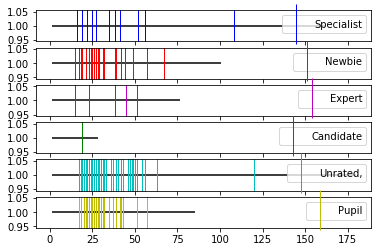

In [13]:
def plot_data_1D_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].legend(loc="upper right")
        
plot_data_1D_cat(nloc,usertype)

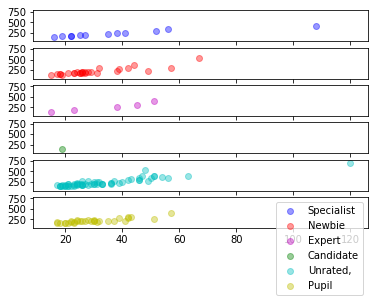

In [15]:
def plot_data_2D_cat(X,Y,C,title='Title'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.4)
        plot.append(l)
        cat.append(x)
        
    plt.legend(plot,cat)
    
plot_data_2D_cat(nloc,token_count,usertype)

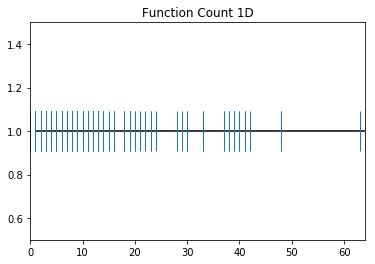

In [11]:
plot_data_1D(function_count,'Function Count 1D')

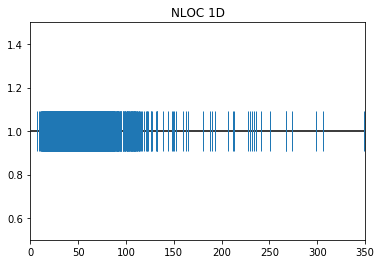

In [12]:
plot_data_1D(nloc,'NLOC 1D')

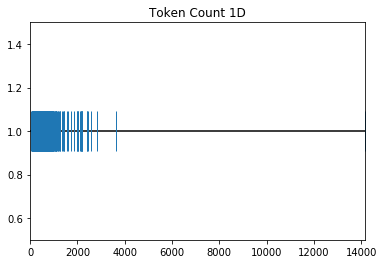

In [13]:
plot_data_1D(token_count,'Token Count 1D')

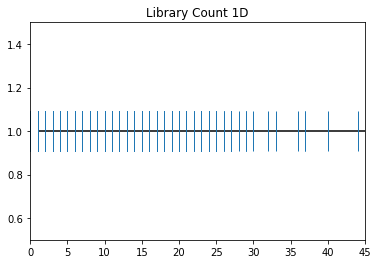

In [14]:
plot_data_1D(library_count,'Library Count 1D')

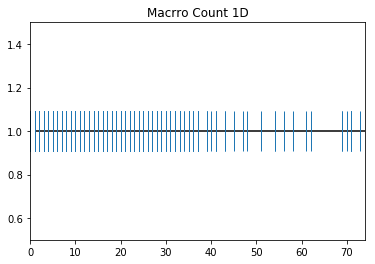

In [15]:
plot_data_1D(macro_count,'Macrro Count 1D')

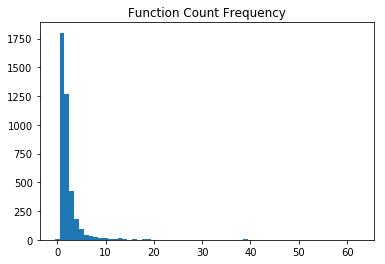

In [16]:
plotdata_frequency(function_count,'Function Count Frequency')

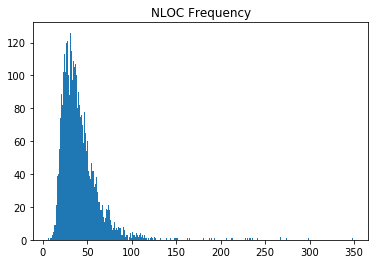

In [17]:
plotdata_frequency(nloc,'NLOC Frequency') # doesn't make sense

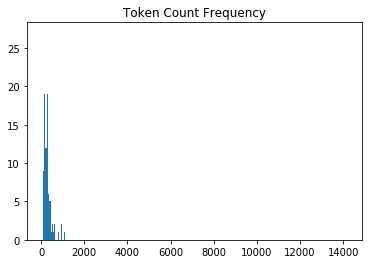

In [18]:
plotdata_frequency(token_count,'Token Count Frequency')

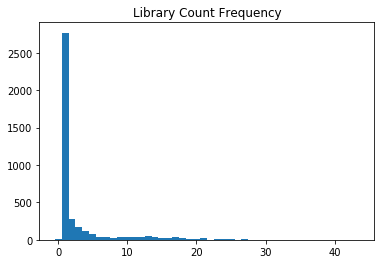

In [19]:
plotdata_frequency(library_count,'Library Count Frequency')

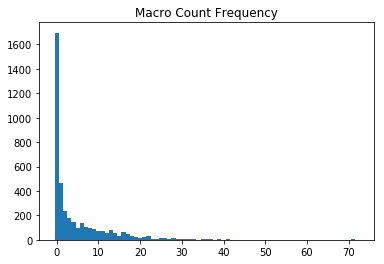

In [20]:
plotdata_frequency(macro_count,'Macro Count Frequency')

In [21]:
stat_display(function_count)

min :  0
max :  63
mean :  2.384442221110555
variance :  11.819392621004022
skewness :  8.05637188242
kurtosis :  87.795388902


In [22]:
stat_display(nloc)

min :  7
max :  349
mean :  42.05427713856928
variance :  567.4744112736878
skewness :  4.05726574024
kurtosis :  31.2638346867


In [23]:
stat_display(token_count)

min :  52
max :  14160
mean :  300.1150575287644
variance :  93290.79286303146
skewness :  25.1156548568
kurtosis :  1069.7993266


In [24]:
stat_display(library_count)

min :  0
max :  44
mean :  3.157578789394697
variance :  24.787271794516215
skewness :  2.93319266143
kurtosis :  9.49987357688


In [25]:
stat_display(macro_count)

min :  0
max :  73
mean :  4.915207603801901
variance :  65.77139238871375
skewness :  2.96663453706
kurtosis :  13.5099864762


In [26]:
find_max_json(function_count)

{u'filename': u'617.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 5,
   u'end_line': 63,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'617.cpp',
   u'general_fan_out': 0,
   u'length': 51,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 23,
   u'parameters': [],
   u'start_line': 13,
   u'token_count': 93,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'nloc': 26,
 u'token_count': 105}

In [27]:
find_min_json(function_count)

{u'filename': u'1096.cpp',
 u'function_count': 2,
 u'function_details': [{u'cyclomatic_complexity': 1,
   u'end_line': 25,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1096.cpp',
   u'general_fan_out': 0,
   u'length': 5,
   u'long_name': u'cmp( fr a , fr b)',
   u'name': u'cmp',
   u'nloc': 3,
   u'parameters': [u'a', u'b'],
   u'start_line': 21,
   u'token_count': 19,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 4,
   u'end_line': 83,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1096.cpp',
   u'general_fan_out': 0,
   u'length': 51,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 26,
   u'parameters': [],
   u'start_line': 33,
   u'token_count': 178,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'nloc': 34,
 u'token_count': 230}

In [28]:
find_max_json(nloc)

{u'filename': u'302.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 3,
   u'end_line': 67,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'302.cpp',
   u'general_fan_out': 0,
   u'length': 43,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 22,
   u'parameters': [],
   u'start_line': 25,
   u'token_count': 130,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'nloc': 29,
 u'token_count': 166}

In [29]:
find_min_json(nloc)

{u'filename': u'130.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 4,
   u'end_line': 57,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'130.cpp',
   u'general_fan_out': 0,
   u'length': 39,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 20,
   u'parameters': [],
   u'start_line': 19,
   u'token_count': 151,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'nloc': 26,
 u'token_count': 181}

In [30]:
find_min_json(token_count)

{u'filename': u'806.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 5,
   u'end_line': 55,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'806.cpp',
   u'general_fan_out': 0,
   u'length': 47,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 24,
   u'parameters': [],
   u'start_line': 9,
   u'token_count': 142,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 1,
 u'nloc': 26,
 u'token_count': 149}

In [31]:
find_max_json(library_count)

{u'filename': u'470.cpp',
 u'function_count': 2,
 u'function_details': [{u'cyclomatic_complexity': 2,
   u'end_line': 15,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'470.cpp',
   u'general_fan_out': 0,
   u'length': 9,
   u'long_name': u'sum_digits( int x)',
   u'name': u'sum_digits',
   u'nloc': 5,
   u'parameters': [u'x'],
   u'start_line': 7,
   u'token_count': 29,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 3,
   u'end_line': 47,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'470.cpp',
   u'general_fan_out': 0,
   u'length': 23,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 9,
   u'parameters': [],
   u'start_line': 25,
   u'token_count': 67,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 0,
 u'nloc': 18,
 u'token_count': 113}

In [32]:
find_min_json(library_count)

{u'filename': u'1189.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 7,
   u'end_line': 87,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1189.cpp',
   u'general_fan_out': 0,
   u'length': 51,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 26,
   u'parameters': [],
   u'start_line': 37,
   u'token_count': 170,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 5,
 u'nloc': 33,
 u'token_count': 214}

In [33]:
find_max_json(macro_count)

{u'filename': u'1421.cpp',
 u'function_count': 4,
 u'function_details': [{u'cyclomatic_complexity': 2,
   u'end_line': 101,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1421.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'gcd( ll a , ll b)',
   u'name': u'gcd',
   u'nloc': 1,
   u'parameters': [u'a', u'b'],
   u'start_line': 101,
   u'token_count': 25,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 1,
   u'end_line': 103,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1421.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'lcm( ll a , ll b)',
   u'name': u'lcm',
   u'nloc': 1,
   u'parameters': [u'a', u'b'],
   u'start_line': 103,
   u'token_count': 24,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 1,
   u'end_line': 127,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1421.cpp',
   u'general_fan_out': 0,
   u'length': 21,
   u'long_name': u'PLAY()',
   u'name': u'PLAY',
   u'nloc': 8,
   u'parameters': [],


In [34]:
find_min_json(macro_count)

{u'filename': u'1.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 5,
   u'end_line': 73,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1.cpp',
   u'general_fan_out': 0,
   u'length': 49,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 24,
   u'parameters': [],
   u'start_line': 25,
   u'token_count': 178,
   u'top_nesting_level': 0}],
 u'library_count': 9,
 u'macro_count': 0,
 u'nloc': 34,
 u'token_count': 201}

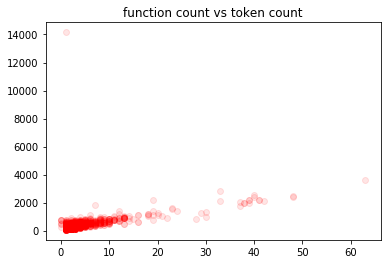

In [35]:
plot_data_2D(function_count,token_count,'function count vs token count','r')

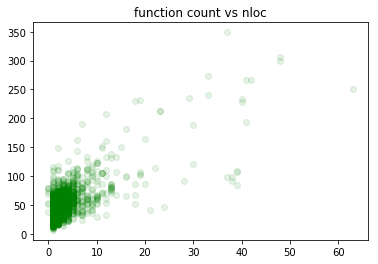

In [36]:
plot_data_2D(function_count,nloc,'function count vs nloc','g')

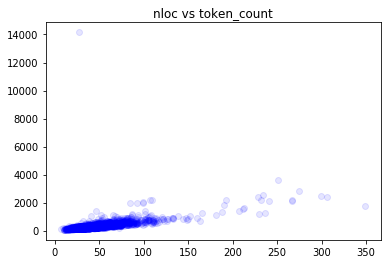

In [37]:
plot_data_2D(nloc,token_count,'nloc vs token_count','b')

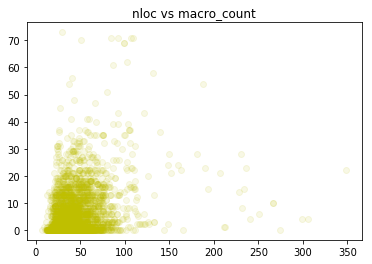

In [38]:
plot_data_2D(nloc,macro_count,'nloc vs macro_count','y')

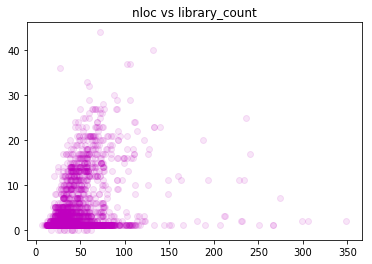

In [39]:
plot_data_2D(nloc,library_count,'nloc vs library_count','m')

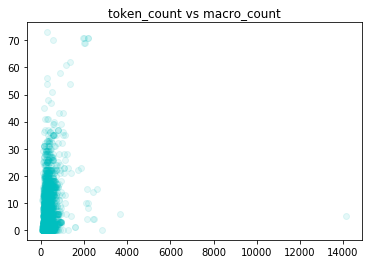

In [40]:
plot_data_2D(token_count,macro_count,'token_count vs macro_count','c')

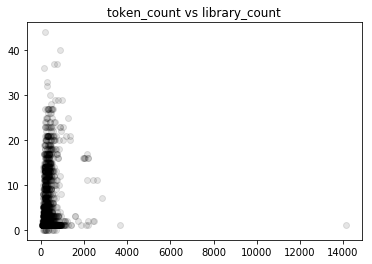

In [41]:
plot_data_2D(token_count,library_count,'token_count vs library_count','k')

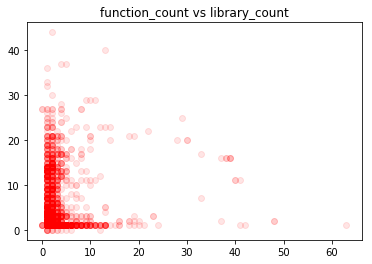

In [42]:
plot_data_2D(function_count,library_count,'function_count vs library_count','r')

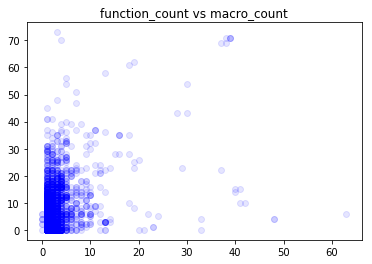

In [43]:
plot_data_2D(function_count,macro_count,'function_count vs macro_count','b')

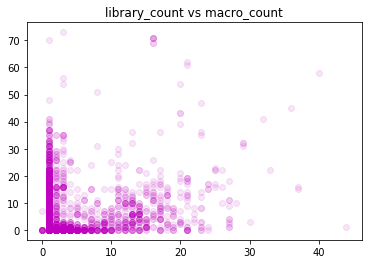

In [44]:
plot_data_2D(library_count,macro_count,'library_count vs macro_count','m')